The dataset used in this project is mall-customers-data.csv. It contains 200 rows and 5 columns:

- customer_id: unique ID assigned to the customer.
- gender: gender of the customer (male or female).
- age: age of the customer.
- annual_income: annual income of the customer in thousands of dollars.
- spending_score: score assigned by the mall based on customer behavior and spending nature.

Cluster the customers based on their purchasing behavior and demographic characteristics

In [121]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/Mall_customers.csv", encoding='unicode_escape')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


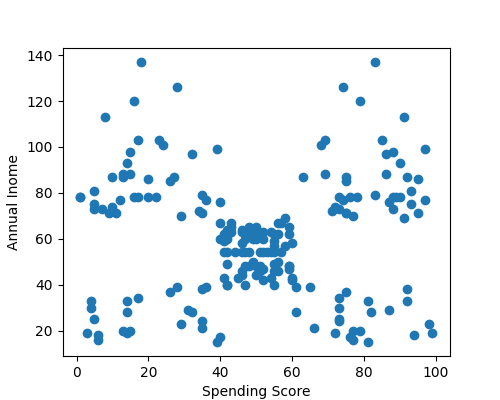

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.scatter(data["Spending Score (1-100)"],data["Annual Income (k$)"])
plt.xlabel("Spending Score")
plt.ylabel("Annual Inome")
plt.show()

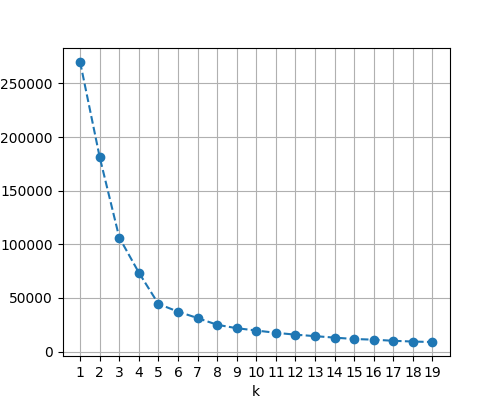

In [134]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init="k-means++",n_init=10,)
    kmeans.fit_predict(data[["Spending Score (1-100)", "Annual Income (k$)"]])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(5,4))
plt.plot( range(1,20),wcss,"--o")
plt.xlabel("k")
plt.ylabel("inertia")
plt.xticks( range(1,20))
plt.grid(True)
plt.show()

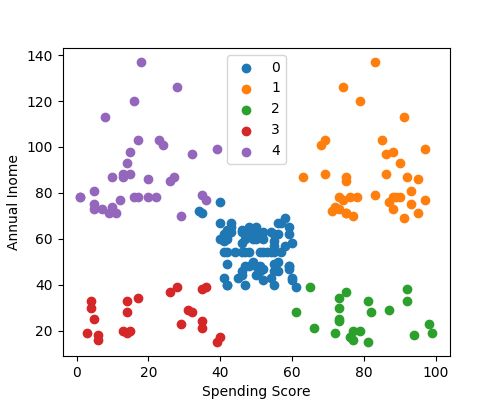

In [124]:
kmeans = KMeans(n_clusters=5, init="k-means++",n_init=10,)
kmeans.fit_predict(data[["Spending Score (1-100)", "Annual Income (k$)"]])
plt.figure(figsize=(5,4))
for label in np.unique(kmeans.labels_):
    plt.scatter(data.loc[kmeans.labels_==label,"Spending Score (1-100)"],data.loc[kmeans.labels_==label,"Annual Income (k$)"], label=label)
    plt.xlabel("Spending Score")
    plt.ylabel("Annual Inome")
plt.legend()

 The blue cluster is the customers with the least income and least spending score, similarly, the red cluster is the customers with the most income and most spending score.

### k-Means Clustering on the basis of 3D data

Apart from the spending score and annual income of customers, we shall also take in the age of the customers.

first, we need to find the best number of clusters

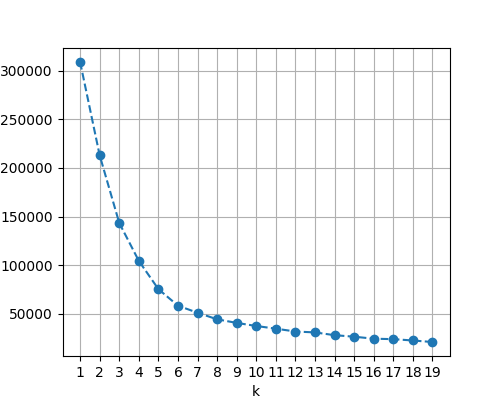

In [133]:
X = data[["Spending Score (1-100)", "Annual Income (k$)", "Age"]]
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init="k-means++",n_init=10,)
    kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(5,4))
plt.plot( range(1,20),wcss,"--o")
plt.xlabel("k")
plt.ylabel("inertia")
plt.xticks( range(1,20))
plt.grid(True)
plt.show()

Set k=5 and rerun KMeans

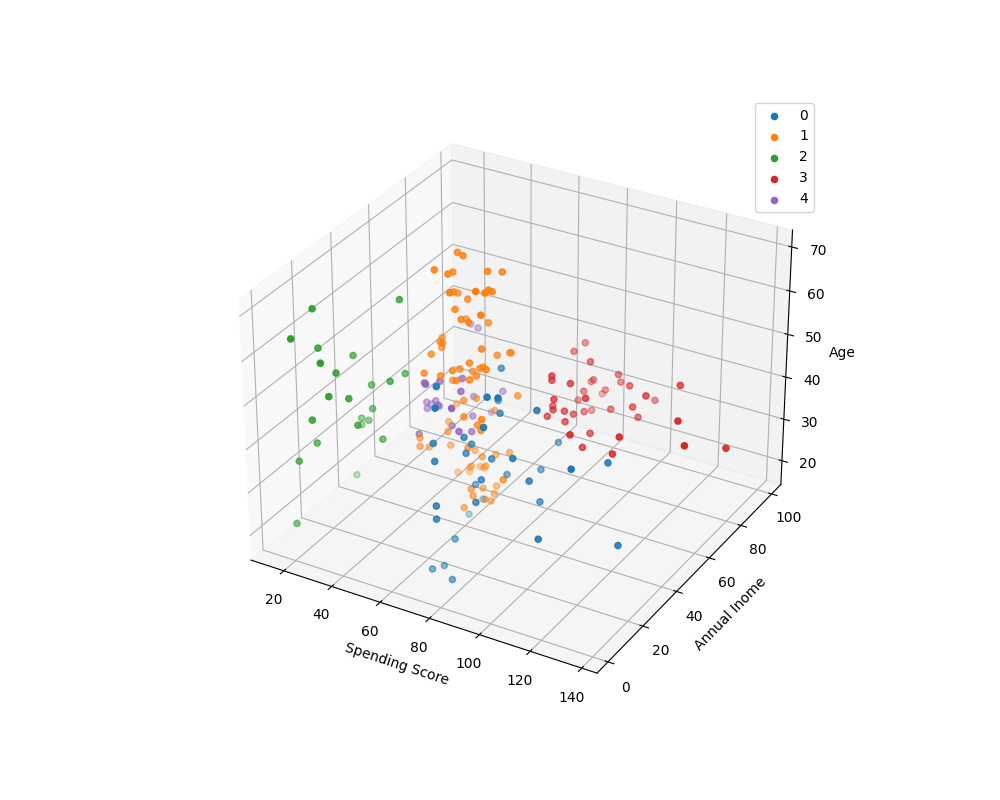

In [126]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib widget
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection="3d")
kmeans = KMeans(n_clusters=5, init="k-means++",n_init=10)
kmeans.fit_predict(X)
for label in np.unique(kmeans.labels_):
    ax.scatter(X.loc[kmeans.labels_==label,"Annual Income (k$)"],X.loc[kmeans.labels_==label,"Spending Score (1-100)"], X.loc[kmeans.labels_==label,"Age"], label=label)
plt.xlabel("Spending Score")
plt.ylabel("Annual Inome")
ax.set_zlabel("Age")
plt.legend()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18400\722168864.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\s

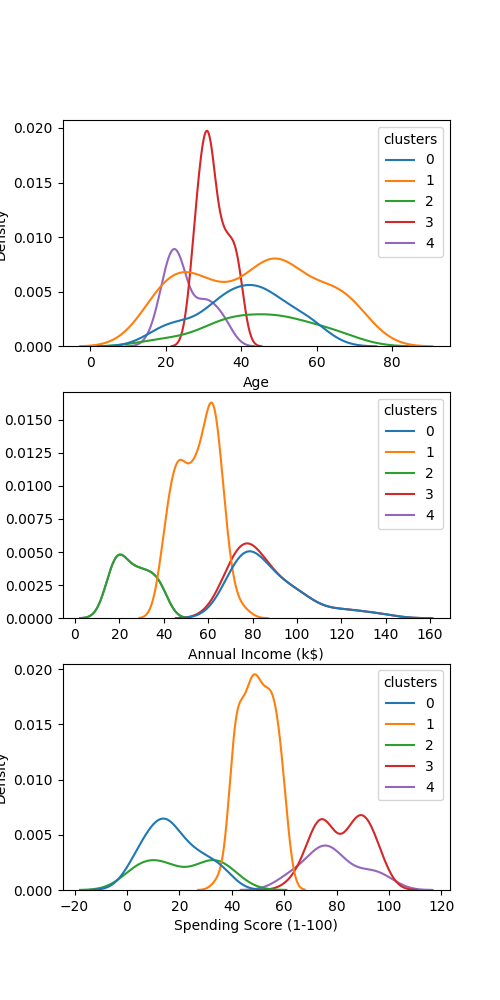

In [132]:
import seaborn as sns
fig = plt.figure(figsize=(5,10))
X["clusters"] = kmeans.labels_
ax = fig.add_subplot(311)
sns.kdeplot(X,x="Age", hue="clusters", palette=sns.color_palette(n_colors=5))
ax = fig.add_subplot(312)
sns.kdeplot(X,x="Annual Income (k$)", hue="clusters", palette=sns.color_palette(n_colors=5))
ax = fig.add_subplot(313)
sns.kdeplot(X,x="Spending Score (1-100)", hue="clusters", palette=sns.color_palette(n_colors=5))
plt.show()


### Cluster Analysis

- Blue cluster: Young people with low income but high spending habits
- Red cluster: Young people with moderate income and high spending habits
- Orange cluster: people who actually have pretty good salaries and barely spend money, their age usually lays between thirty and sixty years.
- Green cluster: salary is pretty low and don't spend much money in stores, they are people of all ages.
- Purple cluster: people of all ages whose salary isn't pretty high and their spending score is moderate